In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import load, dump
import seaborn as sns
sns.set(style = 'white', font_scale = 1.2)

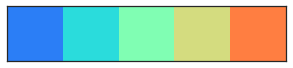

In [194]:
colors = sns.color_palette(palette = 'rainbow',n_colors=5)
sns.palplot(colors)

/home/sxh/anaconda3/envs/rdkit2020/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning


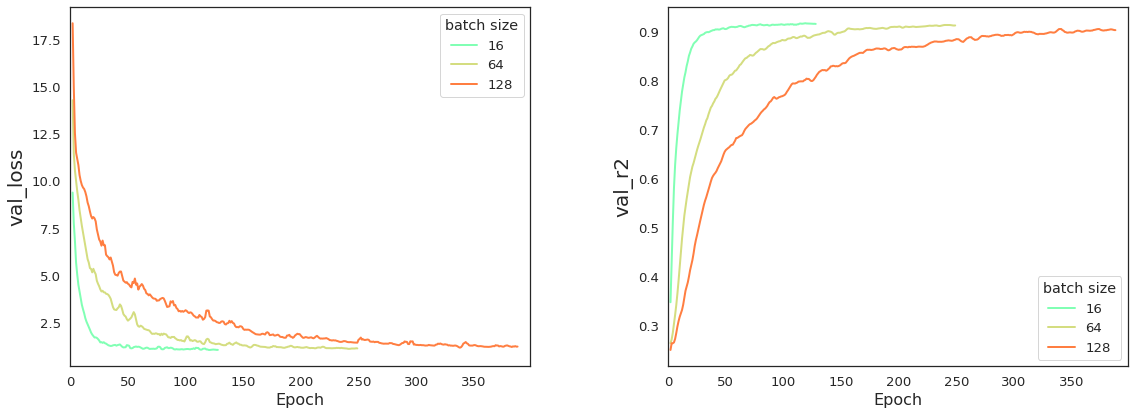

In [204]:
task_name = 'FreeSolv'
batch_sizes, res = load('./%s.res' % task_name)


fig, axes = plt.subplots(ncols=2,figsize=(16,6))


for item, ax in zip(['val_loss', 'val_r2'], axes):
    l_16 = sum(pd.DataFrame(res[0])['process'])/3
    l_64 = sum(pd.DataFrame(res[1])['process'])/3
    l_128 = sum(pd.DataFrame(res[2])['process'])/3

    l16 = l_16[item].to_frame(name = '16')
    l64 = l_64[item].to_frame(name = '64')
    l128 = l_128[item].to_frame(name = '128')

    df = pd.concat([ l16, l64, l128], axis=1)
    df.columns.name = 'batch size'
    
    df.iloc[:400].rolling(3).apply(np.mean).plot(colors = colors[-3:], lw = 2, ax = ax)
    

    ax.set_ylabel(item, fontsize = 20)
    ax.set_xlabel('Epoch', fontsize = 16)   
    
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

fig.savefig( 'val_%s.png' % task_name, dpi=100, format='png')

In [201]:
for i in res:
    x = pd.DataFrame(i).test_rmse.mean()    
    print(round(x, 3))

1.036
0.984
1.062


In [202]:
for i in res:
    x = pd.DataFrame(i).test_rmse.std()    
    print(round(x, 3))

0.216
0.193
0.169


In [228]:
task_name = 'FreeSolv'
batch_sizes, res = load('./%s.10.res' % task_name)


In [229]:
batch_sizes

[16, 64, 128]

In [230]:
pd.DataFrame(res[0]).test_rmse.mean()

0.9751347276900498

In [231]:
pd.DataFrame(res[1]).test_rmse.mean()

1.003971973373774

In [232]:
pd.DataFrame(res[2]).test_rmse.mean()

1.0153651255151916

In [227]:
pd.DataFrame(res[2])

,batch_size,process,valid_rmse,valid_r2,test_rmse,test_r2
0,128,loss val_loss rmse val_rmse...,0.568731,0.925811,0.746580,0.870005
1,128,loss val_loss rmse val_rmse...,0.674943,0.906573,0.623717,0.894406
2,128,loss val_loss rmse val_rmse...,0.548137,0.936359,0.687376,0.877117
3,128,loss val_loss rmse val_rmse...,0.568340,0.901164,0.711758,0.869009
4,128,loss val_loss rmse val_rms...,0.640115,0.925851,0.680333,0.898872
5,128,loss val_loss rmse val_rmse...,0.533566,0.941594,0.636861,0.920134
6,128,loss val_loss rmse val_rms...,0.688133,0.911266,0.548219,0.941730
7,128,loss val_loss rmse val_rmse...,0.629551,0.917832,0.517717,0.939604
8,128,loss val_loss rmse val_rmse...,0.502403,0.937287,0.601520,0.917485
9,128,loss val_loss rmse val_rmse...,0.599316,0.915431,0.630443,0.903001


In [ ]:
fig, axes = plt.subplots(ncols=2,figsize=(16,6))


for item, ax in zip(['val_loss', 'val_r2'], axes):
    l_16 = sum(pd.DataFrame(res[0])['process'])/3
    l_64 = sum(pd.DataFrame(res[1])['process'])/3
    l_128 = sum(pd.DataFrame(res[2])['process'])/3

    l16 = l_16[item].to_frame(name = '16')
    l64 = l_64[item].to_frame(name = '64')
    l128 = l_128[item].to_frame(name = '128')

    df = pd.concat([ l16, l64, l128], axis=1)
    df.columns.name = 'batch size'
    
    df.iloc[:400].rolling(3).apply(np.mean).plot(colors = colors[-3:], lw = 2, ax = ax)
    

    ax.set_ylabel(item, fontsize = 20)
    ax.set_xlabel('Epoch', fontsize = 16)   
    
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

fig.savefig( 'val_%s.png' % task_name, dpi=100, format='png')